# U5E1 Pre Assignment Exercise
ANN Model - MNIST Dataset
Author: Gowtham Iyer

#Import required libraries

In [1]:
import tensorflow
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import Sequential
from keras.src.engine import sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.metrics import accuracy_score

## Loading the MNIST dataset

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


## Checking the shape of training dataset



In [3]:
X_train.shape

(60000, 28, 28)

## Checking the shape of testing dataset

In [4]:
X_test.shape

(10000, 28, 28)

## Printing labels of the dataset

In [5]:
print(y_train)
print(y_train.shape)
print(y_test)
print(y_test.shape)

[5 0 4 ... 5 6 8]
(60000,)
[7 2 1 ... 4 5 6]
(10000,)


## Plotting the train data

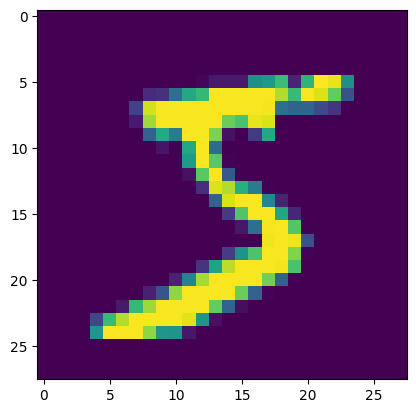

In [6]:
plt.imshow(X_train[0])

## Transforming values between 0-1 for faster convergence

In [7]:
X_train = X_train/255
X_test = X_test/255


## Implementing ANN

In [8]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation ='relu'))
model.add(Dense(10,activation ='softmax'))

## Summarizing the model

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Optimizing the loss

In [10]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

## Training the model on training images and labels

In [11]:
history = model.fit(X_train, y_train, epochs = 10, validation_split = 0.2)

Epoch 1/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2821 - accuracy: 0.9204 - val_loss: 0.1668 - val_accuracy: 0.9536
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1274 - accuracy: 0.9629 - val_loss: 0.1151 - val_accuracy: 0.9648
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0865 - accuracy: 0.9743 - val_loss: 0.1003 - val_accuracy: 0.9706
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0644 - accuracy: 0.9811 - val_loss: 0.0885 - val_accuracy: 0.9740
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0493 - accuracy: 0.9856 - val_loss: 0.0874 - val_accuracy: 0.9737
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0391 - accuracy: 0.9880 - val_loss: 0.0888 - val_accuracy: 0.9759
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0304 - accuracy: 0.9907 - val_loss: 0.0858 - val_accuracy:

## Predicting the probability of the model

In [12]:
probablity = model.predict(X_test)
predicted = probablity.argmax(axis = 1)

313/313 [==============================] - 1s 3ms/step


## Checking the accuracy of the predicted model

In [13]:
accuracy_score(y_test,predicted)

0.9768

## Plotting the loss performance from the model

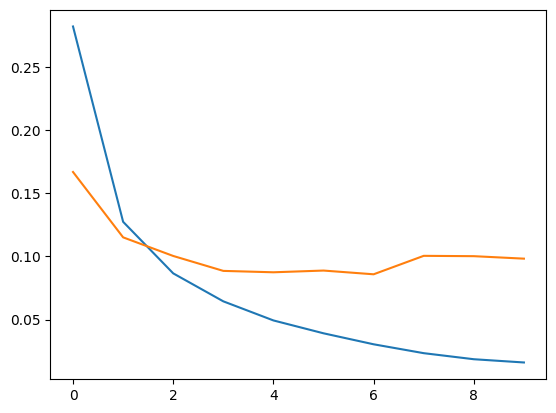

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

## Ploting the accuracy and validation accuracy of the model

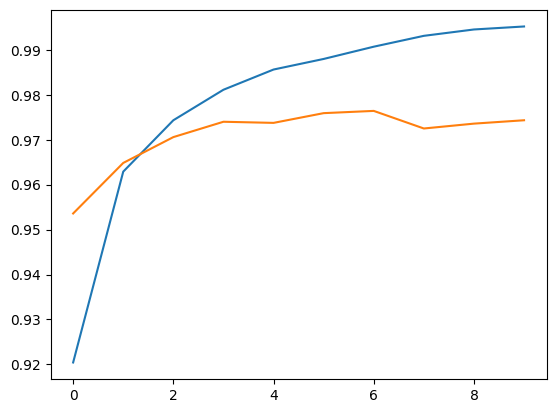

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

## Testing the model

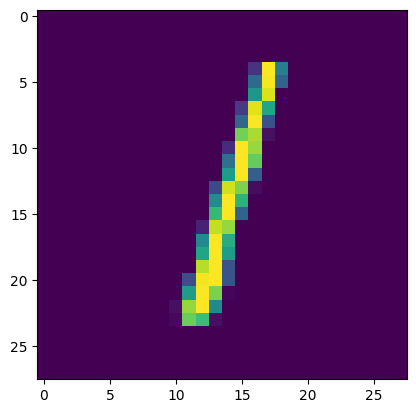

In [16]:
plt.imshow(X_test[2])

## Evaluating the model on test data

In [17]:
model.predict(X_test[2].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 20ms/step


array([1])

## Saving the model

In [19]:
model.save("model_MNIST.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
